# Regression => RMSE, MAE, R^2
```
VMI_data.xls
```
- index : "Part Number"
- columns : "Cret_TIME"
- values : "D일 투입 예정 수량 (D일 계획)

## 1. 라이브러리 & 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
df = pd.read_excel('/content/VMI_data.xls', index_col=0)
df = df.fillna(0)

In [4]:
# 'CRET_TIME' 열에 대해 datetime으로 변환하는 함수 정의
def convert_to_datetime(date_string):
    # date_string = date_string[:8]
    # 문자열 형식 지정
    date_format = "%Y%m%d%H%M"
    date_format1 = "%Y%m%d"
    return datetime.strptime(date_string, date_format)

# apply 함수를 사용하여 'CRET_TIME' 열 변환
df['CRET_TIME'] = df['CRET_TIME'].astype(str)

df['CRET_TIME'] = df['CRET_TIME'].apply(convert_to_datetime)

In [5]:
pivot_result = df.pivot_table(index='Part Number', columns='CRET_TIME', values='D일 투입예정 수량(D일계획)')
pivot_result = pivot_result.fillna(0)
P = pivot_result.T

In [ ]:
P

Part Number,Part 0,Part 1,Part 10,Part 100,Part 101,Part 102,Part 103,Part 104,Part 105,Part 106,...,Part 90,Part 91,Part 92,Part 93,Part 94,Part 95,Part 96,Part 97,Part 98,Part 99
CRET_TIME,,,,,,,,,,,,,,,,,,,,,
2021-09-13 18:30:00,0.0,0.0,16.0,38.0,0.0,0.0,23.0,223.0,0.0,263.0,...,23.0,46.0,266.0,0.0,42.0,113.0,0.0,127.0,40.0,124.0
2021-09-14 06:05:00,0.0,0.0,16.0,38.0,0.0,0.0,23.0,223.0,0.0,263.0,...,23.0,46.0,266.0,0.0,42.0,113.0,0.0,127.0,40.0,124.0
2021-09-14 06:25:00,0.0,0.0,16.0,35.0,0.0,3.0,9.0,199.0,0.0,234.0,...,20.0,46.0,4.0,0.0,40.0,209.0,0.0,32.0,33.0,150.0
2021-09-14 06:34:00,0.0,0.0,16.0,35.0,0.0,3.0,9.0,199.0,0.0,234.0,...,20.0,46.0,4.0,0.0,40.0,209.0,0.0,32.0,33.0,150.0
2021-09-14 17:30:00,0.0,0.0,16.0,35.0,0.0,3.0,9.0,199.0,0.0,234.0,...,20.0,46.0,4.0,0.0,40.0,209.0,0.0,32.0,33.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29 12:34:00,0.0,0.0,156.0,23.0,0.0,50.0,134.0,102.0,0.0,444.0,...,20.0,84.0,630.0,0.0,45.0,264.0,0.0,3.0,0.0,49.0
2021-10-29 15:03:00,0.0,0.0,156.0,23.0,0.0,50.0,134.0,102.0,0.0,444.0,...,20.0,84.0,630.0,0.0,45.0,264.0,0.0,3.0,0.0,49.0
2021-10-29 15:38:00,0.0,0.0,156.0,23.0,0.0,50.0,134.0,102.0,0.0,444.0,...,20.0,84.0,630.0,0.0,45.0,264.0,0.0,3.0,0.0,49.0


In [6]:
# 0의 값이 가장 작은 행의 인덱스 찾기
min_zero_row_index = P[P.eq(0.0).sum(axis=1) > 0].sum(axis=0).idxmin()

print("가장 작은 0의 값을 가진 행의 인덱스:", min_zero_row_index)

가장 작은 0의 값을 가진 행의 인덱스: Part 115


In [7]:
# 열 별 0 값의 개수 계산
zero_count_per_col = (P == 0).sum()

# 0 값이 가장 적은 열의 이름 찾기
min_zero_count_col = zero_count_per_col.idxmin()

print("0 값이 가장 적은 열의 이름:", min_zero_count_col)

0 값이 가장 적은 열의 이름: Part 94


In [81]:
dfP = P['Part 77']
type(dfP)
dfP=pd.DataFrame(dfP)

## 2. EDA

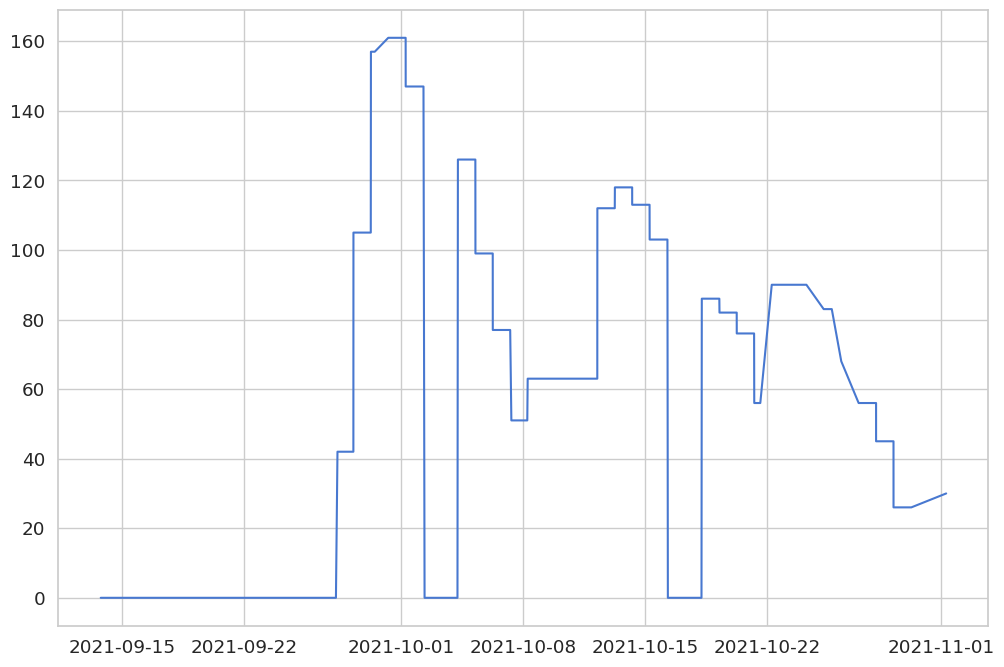

In [82]:
plt.figure(figsize=[12, 8])
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

plt.plot(dfP)
plt.show()

## 3. Time Series 데이터 전처리

In [83]:
def create_sequences(data, seq_length):  # seq_length 단위로 보겠다 ex) 5일 단위로 보겠다 => seq_length=5
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 4  # 4일 단위로 !
X, y = create_sequences(dfP, seq_length)

In [84]:
X.shape

(149, 4, 1)

In [85]:
y.shape

(149, 1)

In [86]:
train_size = int(149 * 0.8)
#119, 15, 15
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+15], y[train_size:train_size+15]
X_test, y_test = X[train_size+15:], y[train_size+15:]

In [89]:
X_train.shape

(119, 4, 1)

In [90]:
MIN = X_train.min()
MAX = X_train.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)

X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)

X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

In [91]:
import torch

def make_tensor(array):
    return torch.from_numpy(array).float()

X_train = make_tensor(X_train)
y_train = make_tensor(y_train)

X_val = make_tensor(X_val)
y_val = make_tensor(y_val)

X_test = make_tensor(X_test)
y_test = make_tensor(y_test)

In [92]:
from torch import nn, optim

class LSTM(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(LSTM, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [93]:
RANDOM_SEED = 77
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #L1Loss=MAE Loss
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []

    for t in range(num_epochs):
        epoch_loss = 0
        for idx, seq in enumerate(train_data):
            model.reset_hidden_state() # seq 별 hidden state reset

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()
        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:
            with torch.no_grad():
                val_loss = 0
                for val_idx, val_seq in enumerate(val_data):
                    model.reset_hidden_state() # seq 별로 hidden state 초기화

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss
            val_hist.append(val_loss / len(val_data)) # val hist에 추가

            ## verbose 번째 마다 loss 출력
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):

                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :
                    print('\n Early Stopping')
                    break
        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')

    return model, train_hist, val_hist

In [94]:
model_lstm = LSTM(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1)
print(model_lstm)

LSTM(
  (lstm): LSTM(1, 4)
  (linear): Linear(in_features=4, out_features=1, bias=True)
)


In [95]:
model_lstm, train_hist, val_hist = train_model(
    model_lstm,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=110,
    verbose=10,
    patience=50)

Epoch 0 train loss: 0.38774918458041024 val loss: 0.3719581663608551
Epoch 10 train loss: 0.13747822612273594 val loss: 0.03968784958124161
Epoch 20 train loss: 0.05252446988675775 val loss: 0.02777111530303955
Epoch 30 train loss: 0.053179635533264706 val loss: 0.025036698207259178
Epoch 40 train loss: 0.05194841851206387 val loss: 0.024706387892365456
Epoch 50 train loss: 0.0523471681385481 val loss: 0.025119632482528687
Epoch 60 train loss: 0.05181937955883371 val loss: 0.027473222464323044
Epoch 70 train loss: 0.05187551298436998 val loss: 0.02479904145002365
Epoch 80 train loss: 0.05151790781181399 val loss: 0.025046272203326225
Epoch 90 train loss: 0.05332857116806407 val loss: 0.02460918202996254
Epoch 100 train loss: 0.05355756917670995 val loss: 0.026534946635365486

 Early Stopping


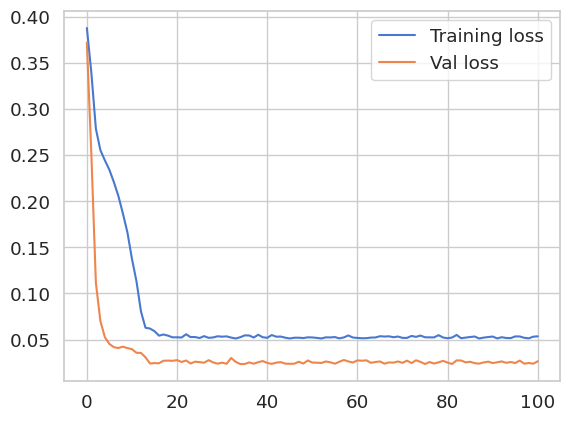

In [96]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_pred):
    print('* MAE:', mean_absolute_error(y_test, y_pred))
    print('* RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('* R_Square:', r2_score(y_test, y_pred))

In [98]:
evaluate(np.array(y_test)*MAX, np.array(preds_lstm)*MAX)

* MAE: 3.7562823851903278
* RMSE: 6.283758642109284
* R_Square: 0.7231798710513482


* MAE: 3.599898036321004
* RMSE: 10.980960673532994
* R_Square: 0.033191145610278805

In [97]:
pred_dataset = X_test

with torch.no_grad():
    preds_lstm = []
    for _ in range(len(pred_dataset)):
        model_lstm.reset_hidden_state()
        y_test_pred = model_lstm(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds_lstm.append(pred)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# RMSE (Root Mean Squared Error) 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)

# R^2 (결정 계수) 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

RMSE: 8.5455
MAE: 7.3921
R^2: -26.4299
